In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cement_slump.csv')

In [3]:
df.head()

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

   FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0      62.0                               34.99  
1      20.0                               41.14  
2      20.0                               41.81  
3      21.5                               42.08  
4      64.0                               26.82

In [4]:
df.shape

(103, 10)

In [5]:
df.describe()

Cement        Slag     Fly ash       Water          SP  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   229.894175   77.973786  149.014563  197.167961    8.539806   
std     78.877230   60.461363   85.418080   20.208158    2.807530   
min    137.000000    0.000000    0.000000  160.000000    4.400000   
25%    152.000000    0.050000  115.500000  180.000000    6.000000   
50%    248.000000  100.000000  164.000000  196.000000    8.000000   
75%    303.900000  125.000000  235.950000  209.500000   10.000000   
max    374.000000  193.000000  260.000000  240.000000   19.000000   

       Coarse Aggr.  Fine Aggr.   SLUMP(cm)   FLOW(cm)  \
count    103.000000  103.000000  103.000000  103.00000   
mean     883.978641  739.604854   18.048544   49.61068   
std       88.391393   63.342117    8.750844   17.56861   
min      708.000000  640.600000    0.000000   20.00000   
25%      819.500000  684.500000   14.500000   38.50000   
50%      879.000000  742.700000   21.500000   54.00000   
75%      952.800000  788.000000   24.000000   63.75000   
max     1049.900000  902.000000   29.000000   78.00000   

       Compressive Strength (28-day)(Mpa)  
count                          103.000000  
mean                            36.038738  
std                              7.837120  
min                             17.190000  
25%                             30.900000  
50%                             35.520000  
75%                             41.205000  
max                             58.530000

<AxesSubplot:>

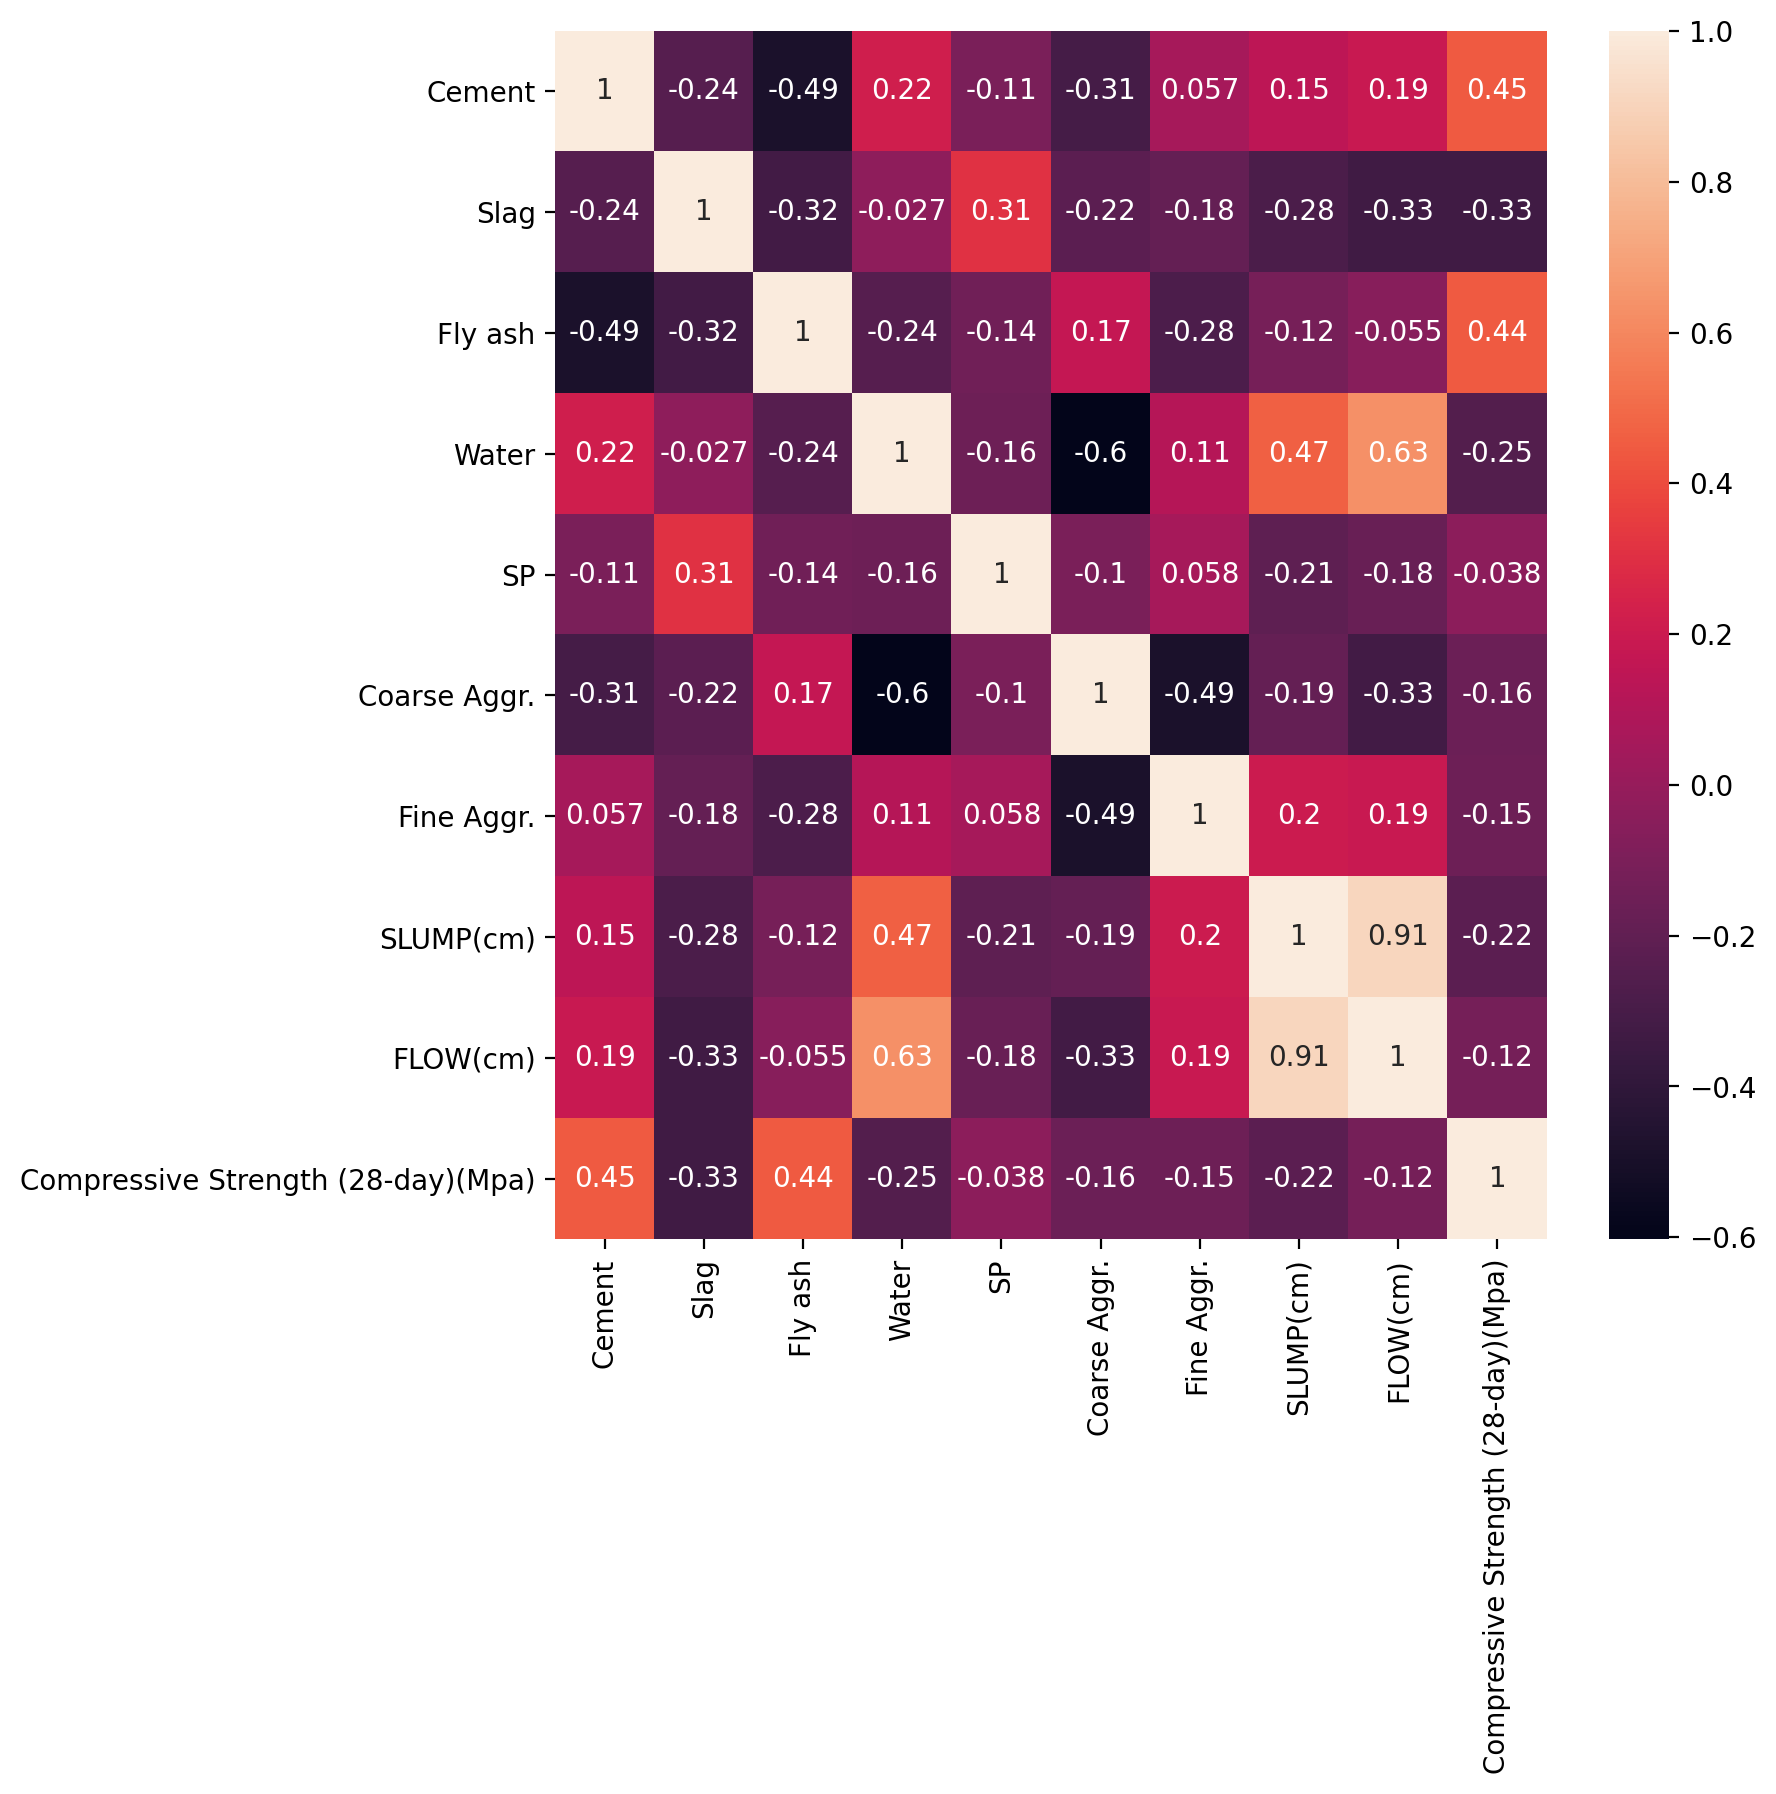

In [6]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

In [15]:
## create a SVM model for regression

from sklearn.svm import SVR, LinearSVR

In [16]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [17]:
base_model = SVR()

In [16]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [17]:
base_pred = base_model.predict(scaled_X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
mean_absolute_error(y_test, base_pred) ##MAE

4.680550861162789

In [27]:
np.sqrt(mean_squared_error(y_test, base_pred)) ##RMSE

6.078255017457036

In [28]:
y_test.mean()

36.718387096774194

In [30]:
param_grid = {'C': [0.001, 0.05,0.01, 0.1, 0.5, 1], 
              'kernel': ['linear', 'rbf', 'poly'], 
              'gamma':['scale', 'auto'],
             'degree':[2,3,4,5],
             'epsilon': [0,0.01,0.1,0.5,1,2]}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
svr = SVR()

In [33]:
grid = GridSearchCV(svr, param_grid)

In [34]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.05, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [37]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
grid_pred = grid.predict(scaled_X_test)

In [39]:
mean_absolute_error(y_test, grid_pred)

1.8530688105852298

In [40]:
np.sqrt(mean_squared_error(y_test, grid_pred)) ##RMSE

2.2802712928131372